# Paso 02 - Carga de los datos y su comprensión
Los datos descargados en formato .csv se encuentran en la carpeta `datos_originales`

In [61]:
import pandas as pd
import os

path = 'datos_originales'
files = os.listdir(path)

dfs = []  #Lista para guardar los nombres de los dataframes creados


for file in files:
    if file.endswith('.csv'):
        name = file.split('.')[0]
        df_name = 'df_' + name
        globals()[df_name] = pd.read_csv(os.path.join(path, file), on_bad_lines='skip')
        dfs.append(df_name)

In [62]:
print(dfs)

['df_01_Internet_Penetracion', 'df_02_Internet_Penetracion', 'df_03_Internet_BAF', 'df_04_Internet_BAF', 'df_05_Internet_Accesos-por-tecnologia', 'df_06_internet_tecno_prov', 'df_07_historico_velocidad_internet', 'df_08_historico_velocidad_internet_provincia', 'df_09_Internet_Accesos-por-velocidad', 'df_10_Internet_Accesos-por-velocidad', 'df_12_Internet_Ingresos', 'df_13_AccesosaInternetfijoporvelocidaddebajadaylocalidad_2776171689452943315', 'df_14_AccesosaInternetfijoportecnologiaylocalidad_2791751688513004191', 'df_15_Listadodelocalidadesconconectividadainternet_2750221689453131271', 'df_16_ConectividadalserviciodeInternet_2776151689453170851']


In [63]:
for name in dfs:
    df = globals()[name]
    print(f'{name}: {df.shape}')

df_01_Internet_Penetracion: (840, 4)
df_02_Internet_Penetracion: (35, 5)
df_03_Internet_BAF: (35, 6)
df_04_Internet_BAF: (840, 6)
df_05_Internet_Accesos-por-tecnologia: (35, 9)
df_06_internet_tecno_prov: (841, 10)
df_07_historico_velocidad_internet: (35, 4)
df_08_historico_velocidad_internet_provincia: (840, 5)
df_09_Internet_Accesos-por-velocidad: (831, 1)
df_10_Internet_Accesos-por-velocidad: (840, 12)
df_12_Internet_Ingresos: (35, 4)
df_13_AccesosaInternetfijoporvelocidaddebajadaylocalidad_2776171689452943315: (3098, 83)
df_14_AccesosaInternetfijoportecnologiaylocalidad_2791751688513004191: (3142, 14)
df_15_Listadodelocalidadesconconectividadainternet_2750221689453131271: (4312, 12)
df_16_ConectividadalserviciodeInternet_2776151689453170851: (4312, 16)


In [64]:
# el fichero df_09 no se cargó bien, solo aparenta tener una columna y tras revisarlo vemos que está separado por ;
df09 = pd.read_csv('./datos_originales/09_Internet_Accesos-por-velocidad.csv', sep=';', thousands=",")

In [65]:
df09.dtypes

Año                      int64
Trimestre                int64
Provincia               object
HASTA 512 kbps           int64
+ 512 Kbps - 1 Mbps      int64
+ 1 Mbps - 6 Mbps        int64
+ 6 Mbps - 10 Mbps       int64
+ 10 Mbps - 20 Mbps      int64
+ 20 Mbps - 30 Mbps      int64
+ 30 Mbps                int64
OTROS                  float64
Total                    int64
Unnamed: 12            float64
Unnamed: 13            float64
Unnamed: 14            float64
Unnamed: 15            float64
Unnamed: 16            float64
Unnamed: 17            float64
Unnamed: 18            float64
Unnamed: 19            float64
Unnamed: 20            float64
Unnamed: 21            float64
Unnamed: 22            float64
Unnamed: 23            float64
dtype: object

In [66]:
pd.set_option('display.max_columns',33)
df09.sample(8)

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
823,2014,1,Entre Ríos,2177,35206,85248,10828,746,0,43,0.0,134248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,2021,4,Tucumán,39,97,37321,48736,21023,5326,125857,240.0,238639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
602,2016,2,Catamarca,15,5736,14742,4567,1496,47,1,0.0,26604,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
282,2019,4,San Luis,105,0,11901,4164,525,55216,3,36287.0,108201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
379,2018,4,Santa Cruz,25,115,23107,779,206,1,4,531.0,24768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
199,2020,3,Entre Ríos,130,2911,66648,51478,40797,14377,49395,15759.0,241495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266,2019,4,Catamarca,63,0,9945,7619,9305,804,7477,3098.0,38311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,2021,3,Mendoza,36,31,151871,12640,62628,7596,21087,50.0,255939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
df09.columns

Index(['Año', 'Trimestre', 'Provincia', 'HASTA 512 kbps',
       '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps',
       '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS',
       'Total', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23'],
      dtype='object')

In [68]:
df09 = df09[['Año', 'Trimestre', 'Provincia', 'HASTA 512 kbps',
       '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps',
       '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS',
       'Total',
       # 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       # 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       # 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23'
       ]].copy()

In [69]:
df09.sample(8)

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
111,2021,3,Río Negro,125,557,68991,3730,14880,2282,34011,20009.0,144585
182,2020,4,Neuquén,116,327,56434,8478,5791,5493,50776,5720.0,133135
629,2016,1,Córdoba,148,59484,414452,65763,66455,4143,1039,0.0,611484
537,2017,1,Jujuy,330,6213,27824,6486,2306,44,0,0.0,43203
569,2016,4,San Juan,8,220,58608,0,0,0,4,0.0,58840
584,2016,3,Formosa,1723,4277,15581,3964,3658,648,10,0.0,29861
719,2015,2,Tucumán,107,25178,83462,26966,4502,455,0,0.0,140670
819,2014,1,Chaco,438,15849,40869,4644,741,5,0,0.0,62546


In [70]:
df09.to_csv('./datos_tratados/df09.csv')

In [71]:
for name in dfs:
    df = globals()[name]       
    print(f'{name}:')
    print(df.dtypes)
    print('')

df_01_Internet_Penetracion:
Año                              int64
Trimestre                        int64
Provincia                       object
Accesos por cada 100 hogares    object
dtype: object

df_02_Internet_Penetracion:
Año                              int64
Trimestre                        int64
Accesos por cada 100 hogares    object
Accesos por cada 100 hab        object
Periodo                         object
dtype: object

df_03_Internet_BAF:
Año                   int64
Trimestre             int64
Banda ancha fija     object
Dial up             float64
Total                object
Periodo              object
dtype: object

df_04_Internet_BAF:
Año                  int64
Trimestre            int64
Provincia           object
Banda ancha fija    object
Dial up             object
Total               object
dtype: object

df_05_Internet_Accesos-por-tecnologia:
Año               int64
Trimestre         int64
ADSL             object
Cablemodem       object
Fibra óptica     object
Wire

In [72]:
# Un vistazo rápido a datos random
for name in dfs:
       df = globals()[name]       
       print(f'{name}:')
       print(df.sample(5)) 
       print('')

df_01_Internet_Penetracion:
      Año  Trimestre         Provincia Accesos por cada 100 hogares
473  2017          4          San Juan                         30,3
414  2018          2        Corrientes                        33,81
466  2017          4          La Pampa                        71,05
426  2018          2          San Luis                        15,15
118  2021          3  Tierra Del Fuego                        94,95

df_02_Internet_Penetracion:
     Año  Trimestre Accesos por cada 100 hogares Accesos por cada 100 hab  \
29  2015          2                        51,76                    15,82   
14  2019          1                        62,48                    19,31   
8   2020          3                        66,31                    20,59   
9   2020          2                        64,21                    19,92   
18  2018          1                        58,82                    18,12   

          Periodo  
29   Abr-Jun 2015  
14   Ene-Mar 2019  
8   Jul-Sept

In [73]:
# Comprobamos si hay muchos nulos
for name in dfs:
    df = globals()[name]
    print(f'{name}:')
    print(df.isna().sum())
    print('')

df_01_Internet_Penetracion:
Año                             0
Trimestre                       0
Provincia                       0
Accesos por cada 100 hogares    0
dtype: int64

df_02_Internet_Penetracion:
Año                             0
Trimestre                       0
Accesos por cada 100 hogares    0
Accesos por cada 100 hab        0
Periodo                         0
dtype: int64

df_03_Internet_BAF:
Año                 0
Trimestre           0
Banda ancha fija    0
Dial up             0
Total               0
Periodo             0
dtype: int64

df_04_Internet_BAF:
Año                 0
Trimestre           0
Provincia           0
Banda ancha fija    0
Dial up             2
Total               0
dtype: int64

df_05_Internet_Accesos-por-tecnologia:
Año             0
Trimestre       0
ADSL            0
Cablemodem      0
Fibra óptica    0
Wireless        0
Otros           0
Total           0
Periodo         0
dtype: int64

df_06_internet_tecno_prov:
Unnamed: 0      0
Año             0


In [74]:
# Echamos un vistazo a los duplicados
for name in dfs:
    df = globals()[name]
    print(f'{name}:')
    print(df.duplicated().sum())
    print('')

df_01_Internet_Penetracion:
0

df_02_Internet_Penetracion:
0

df_03_Internet_BAF:
0

df_04_Internet_BAF:
0

df_05_Internet_Accesos-por-tecnologia:
0

df_06_internet_tecno_prov:
0

df_07_historico_velocidad_internet:
0

df_08_historico_velocidad_internet_provincia:
0

df_09_Internet_Accesos-por-velocidad:
820

df_10_Internet_Accesos-por-velocidad:
0

df_12_Internet_Ingresos:
0

df_13_AccesosaInternetfijoporvelocidaddebajadaylocalidad_2776171689452943315:
0

df_14_AccesosaInternetfijoportecnologiaylocalidad_2791751688513004191:
0

df_15_Listadodelocalidadesconconectividadainternet_2750221689453131271:
2

df_16_ConectividadalserviciodeInternet_2776151689453170851:
0



In [76]:
print(dfs)

['df_01_Internet_Penetracion', 'df_02_Internet_Penetracion', 'df_03_Internet_BAF', 'df_04_Internet_BAF', 'df_05_Internet_Accesos-por-tecnologia', 'df_06_internet_tecno_prov', 'df_07_historico_velocidad_internet', 'df_08_historico_velocidad_internet_provincia', 'df_09_Internet_Accesos-por-velocidad', 'df_10_Internet_Accesos-por-velocidad', 'df_12_Internet_Ingresos', 'df_13_AccesosaInternetfijoporvelocidaddebajadaylocalidad_2776171689452943315', 'df_14_AccesosaInternetfijoportecnologiaylocalidad_2791751688513004191', 'df_15_Listadodelocalidadesconconectividadainternet_2750221689453131271', 'df_16_ConectividadalserviciodeInternet_2776151689453170851']


In [78]:
df = globals()["df_09_Internet_Accesos-por-velocidad"]
print(df.columns)

Index(['Año;Trimestre;Provincia;HASTA 512 kbps;+ 512 Kbps - 1 Mbps;+ 1 Mbps - 6 Mbps;+ 6 Mbps - 10 Mbps;+ 10 Mbps - 20 Mbps;+ 20 Mbps - 30 Mbps;+ 30 Mbps;OTROS;Total;;;;;;;;;;;;'], dtype='object')


In [83]:
# En el df_09_Internet_Accesos-por-velocidad hay muchos duplicados, vamos a ver de qué se trata
duplicados_df_09 = df[df.duplicated()]
print(duplicados_df_09)
# los duplicados no son relevantes, ya que anteriormente hemos visto que este dataset hay que importar
# con la opción sep=';'

                                                                                                                                                                                            Año;Trimestre;Provincia;HASTA 512 kbps;+ 512 Kbps - 1 Mbps;+ 1 Mbps - 6 Mbps;+ 6 Mbps - 10 Mbps;+ 10 Mbps - 20 Mbps;+ 20 Mbps - 30 Mbps;+ 30 Mbps;OTROS;Total;;;;;;;;;;;;
2022;3;Catamarca;71;384;3         107;5            389;5            099;3             737;50           298;2            208;70          293;;;;;;;;;;;; NaN             NaN             NaN                                                NaN                                                                                                                       
2022;3;Chaco;461;987;16           782;18           938;8            049;15            828;79           390;3            711;144         146;;;;;;;;;;;; NaN             NaN             NaN                                                NaN                                              

In [86]:
# el otro dataset que presenta duplicados era df_15_Listadodelocalidadesconconectividadainternet_2750221689453131271
# Vamos a verlos
duplicados_df_15 = df_15_Listadodelocalidadesconconectividadainternet_2750221689453131271[df_15_Listadodelocalidadesconconectividadainternet_2750221689453131271.duplicated()]
print(f"Hay {duplicados_df_15.shape[0]} filas duplicadas en df_15")
print(duplicados_df_15)

Hay 2 filas duplicadas en df_15
         Provincia    Partido     Localidad ADSL CABLEMODEM DIALUP  \
651        TUCUMAN  Cruz Alta      Lastenia   --         --     --   
3366  BUENOS AIRES   La Plata  ruta del sol   SI         --     --   

     FIBRAOPTICA  4G  3G TELEFONIAFIJA WIRELESS SATELITAL  
651           --  SI  SI            --       --        --  
3366          --  SI  SI            --       --        --  


In [90]:
duplicates = df_15_Listadodelocalidadesconconectividadainternet_2750221689453131271.duplicated(subset=['Provincia', 'Partido', 'Localidad'])
print(df_15_Listadodelocalidadesconconectividadainternet_2750221689453131271[duplicates])

         Provincia       Partido        Localidad ADSL CABLEMODEM DIALUP  FIBRAOPTICA  4G  3G TELEFONIAFIJA WIRELESS SATELITAL
243     ENTRE RIOS         Colón           Hocker   --         --     --           --  SI  --            --       --        --
651        TUCUMAN     Cruz Alta         Lastenia   --         --     --           --  SI  SI            --       --        --
1633     RIO NEGRO  General Roca  Barrio La Costa   --         --     --           --  --  --            --       SI        --
2386    ENTRE RIOS        Paraná       El Ramblón   --         --     --           --  SI  --            --       SI        --
3366  BUENOS AIRES      La Plata     ruta del sol   SI         --     --           --  SI  SI            --       --        --
4122      LA RIOJA     Sanagasta  Villa Sanagasta   --         SI     --           SI  SI  SI            SI       SI        SI

         Provincia       Partido        Localidad ADSL CABLEMODEM DIALUP  \
243     ENTRE RIOS         Colón           Hocker   --         --     --   
651        TUCUMAN     Cruz Alta         Lastenia   --         --     --   
1633     RIO NEGRO  General Roca  Barrio La Costa   --         --     --   
2386    ENTRE RIOS        Paraná       El Ramblón   --         --     --   
3366  BUENOS AIRES      La Plata     ruta del sol   SI         --     --   
4122      LA RIOJA     Sanagasta  Villa Sanagasta   --         SI     --   

     FIBRAOPTICA  4G  3G TELEFONIAFIJA WIRELESS SATELITAL  
243           --  SI  --            --       --        --  
651           --  SI  SI            --       --        --  
1633          --  --  --            --       SI        --  
2386          --  SI  --            --       SI        --  
3366          --  SI  SI            --       --        --  
4122          SI  SI  SI            SI       SI        SI  


In [91]:
duplicates = df_15_Listadodelocalidadesconconectividadainternet_2750221689453131271.duplicated(subset=['Provincia', 'Partido', 'Localidad'], keep=False)
print(df_15_Listadodelocalidadesconconectividadainternet_2750221689453131271[duplicates])

         Provincia       Partido        Localidad ADSL CABLEMODEM DIALUP  \
200     ENTRE RIOS         Colón           Hocker   --         --     --   
243     ENTRE RIOS         Colón           Hocker   --         --     --   
650        TUCUMAN     Cruz Alta         Lastenia   --         --     --   
651        TUCUMAN     Cruz Alta         Lastenia   --         --     --   
1632     RIO NEGRO  General Roca  Barrio La Costa   --         --     --   
1633     RIO NEGRO  General Roca  Barrio La Costa   --         --     --   
2385    ENTRE RIOS        Paraná       El Ramblón   --         --     --   
2386    ENTRE RIOS        Paraná       El Ramblón   --         --     --   
3365  BUENOS AIRES      La Plata     ruta del sol   SI         --     --   
3366  BUENOS AIRES      La Plata     ruta del sol   SI         --     --   
4121      LA RIOJA     Sanagasta  Villa Sanagasta   --         --     --   
4122      LA RIOJA     Sanagasta  Villa Sanagasta   --         SI     --   

     FIBRAO

Let's calculate the total number of each type of internet connection and see which one is the most common.  

(Answer): The most common type of internet connection is 4G.

In [92]:
df = pd.DataFrame(df_15_Listadodelocalidadesconconectividadainternet_2750221689453131271)

In [93]:
df.columns

Index(['Provincia', 'Partido', 'Localidad', 'ADSL', 'CABLEMODEM', 'DIALUP',
       'FIBRAOPTICA', '4G', '3G', 'TELEFONIAFIJA', 'WIRELESS', 'SATELITAL'],
      dtype='object')

In [94]:
# Vamos a calcular el tipo de conexión más común.
internet_connections = df[['ADSL', 'CABLEMODEM', 'DIALUP', 'FIBRAOPTICA', '4G', '3G', 'TELEFONIAFIJA', 'WIRELESS', 'SATELITAL']].apply(pd.Series.value_counts)
most_common = internet_connections.idxmax(axis=1)
print(internet_connections)
print("Most common internet connection: ", most_common)

    ADSL  CABLEMODEM  DIALUP  FIBRAOPTICA    4G    3G  TELEFONIAFIJA  \
--  3179        3436    3909         2866  1738  2432           2150   
SI  1133         876     403         1446  2574  1880           2162   

    WIRELESS  SATELITAL  
--      2070       3233  
SI      2242       1079  
Most common internet connection:  --    DIALUP
SI        4G
dtype: object


In [96]:
# Calculemos el número de localidades en cada provincia 
localities_per_province = df['Provincia'].value_counts()
print(localities_per_province)
# y veamos cuál es la que más tiene, jeje, aunque ya lo sabemos con el primer cálculo
most_localities = localities_per_province.idxmax()
print('')
print(most_localities)

Provincia
BUENOS AIRES           901
CORDOBA                556
SANTA FE               388
SAN LUIS               229
MENDOZA                210
ENTRE RIOS             194
CATAMARCA              182
SANTIAGO DEL ESTERO    165
RIO NEGRO              163
JUJUY                  160
MISIONES               143
SALTA                  139
TUCUMAN                117
SAN JUAN               108
LA RIOJA                93
CHACO                   92
CHUBUT                  90
LA PAMPA                89
CORRIENTES              78
FORMOSA                 63
NEUQUEN                 61
CABA                    48
SANTA CRUZ              27
TIERRA DEL FUEGO        16
Name: count, dtype: int64

BUENOS AIRES


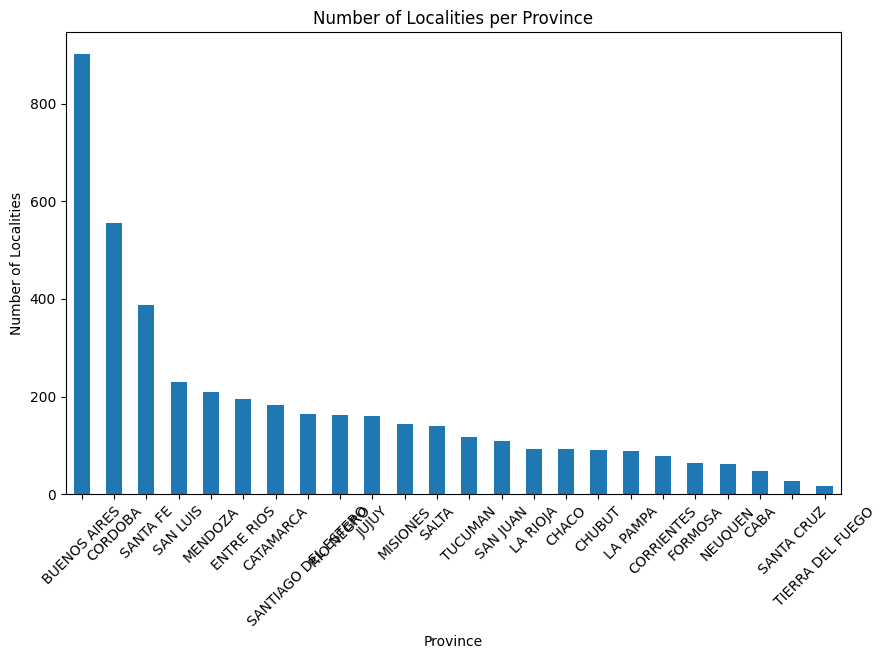

In [97]:
# Dibujemos un diagrama de barras que muestre el número de localidades en cada provincia.
import matplotlib.pyplot as plt
localities_per_province = df['Provincia'].value_counts()
plt.figure(figsize=(10, 6))
localities_per_province.plot(kind='bar')
plt.title('Number of Localities per Province')
plt.xlabel('Province')
plt.ylabel('Number of Localities')
plt.xticks(rotation=45)
plt.show()

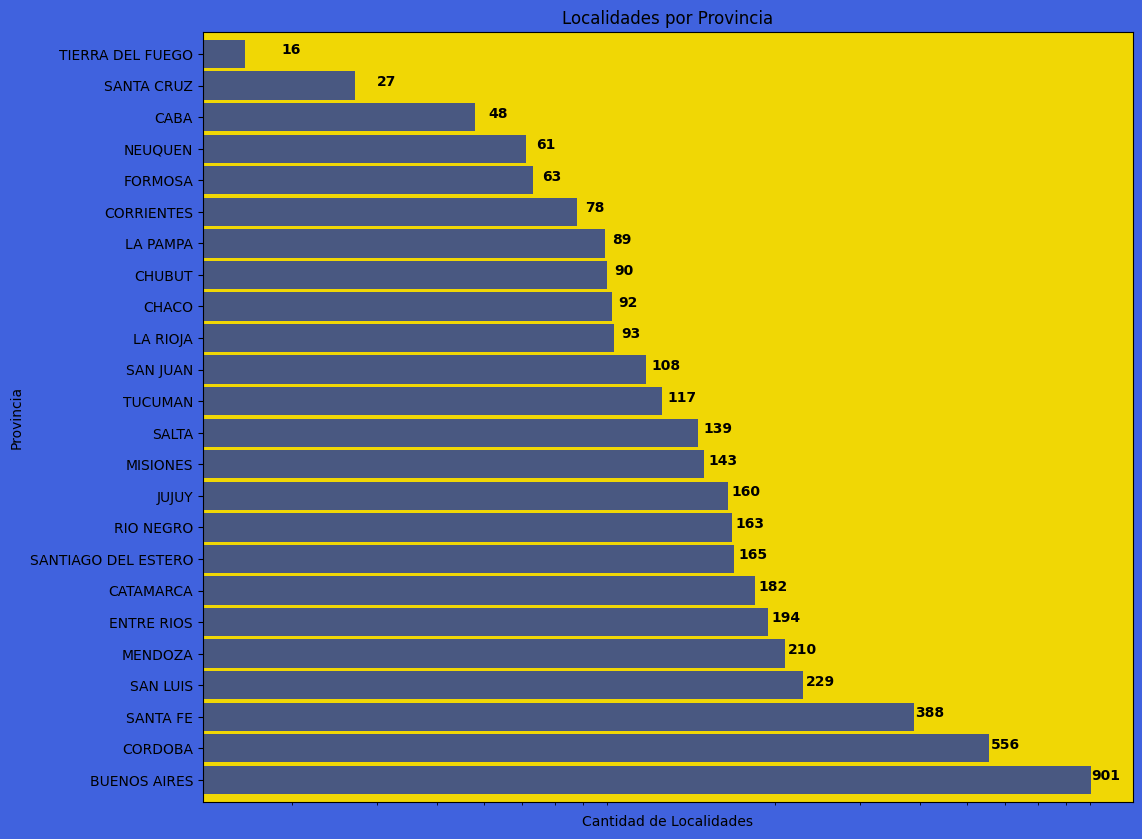

In [116]:
# Mejoremos el gráfico anterior poniendo las barras horizontales y con etiquetas
localities_per_province = df['Provincia'].value_counts()
plt.figure(figsize=(12, 10), facecolor='#4062DE')
ax = localities_per_province.plot(kind='barh', width=0.9, color='#495881')
ax.set_facecolor('#F0D705')
for i, v in enumerate(localities_per_province):
    ax.text(v + 3, i, str(v), color='black', fontweight='bold')

plt.title('Localidades por Provincia')
plt.xlabel('Cantidad de Localidades')
plt.ylabel('Provincia')

# Aquí probamos la escala logarítmica para que haya tanta diferencia entre 'Tierra del Fuego' y 'Buenos Aires'
plt.gca().set_xscale("log")
plt.xticks([]) #Eliminamos las etiquetas del eje x que no nos interesan, ya tenemos las cantidades al lado de cada barra

plt.show()


In [ ]:
Jurisdicción
Total de
viviendas
particulares
Total de
viviendas
colectivas
Total de
población
Población en
viviendas
particulares
Población en
viviendas
colectivas (1)
Población en
situación de
calle (vía
pública)
Total 17.780.210 25.501 46.044.703 45.767.858 273.883 2.962
Ciudad Autónoma de Buenos Aires 1.638.764 1.946 3.120.612 3.092.942 26.767 903
Buenos Aires 6.695.273 6.535 17.569.053 17.450.899 117.193 961
24 Partidos del Gran Buenos Aires 3.714.607 1.383 10.865.182 10.817.508 46.877 797
Resto de partidos de la Provincia
de Buenos Aires 2.980.666 5.152 6.703.871 6.633.391 70.316 164
Catamarca 158.989 449 429.556 427.415 2.139 2
Chaco 401.658 443 1.142.963 1.137.027 5.877 59
Chubut 236.010 1.123 603.120 599.568 3.508 44
Córdoba 1.630.356 3.548 3.978.984 3.946.235 32.658 91
Corrientes 406.480 555 1.197.553 1.195.538 1.977 38
Entre Ríos 559.398 1.159 1.426.426 1.416.324 9.963 139
Formosa 212.941 232 606.041 604.278 1.763 ///
Jujuy 276.222 326 797.955 797.009 864 82
La Pampa 163.805 437 366.022 364.556 1.462 4
La Rioja 149.910 272 384.607 383.128 1.479 ///
Mendoza 708.354 1.744 2.014.533 2.001.281 13.231 21
Misiones 466.850 652 1.280.960 1.275.142 5.792 26
Neuquén 273.685 392 726.590 723.663 2.920 7
Río Negro 295.502 910 762.067 758.001 4.066 ///
Salta 478.433 766 1.440.672 1.431.838 8.590 244
San Juan 265.047 387 818.234 814.856 3.357 21
San Luis 201.271 339 540.905 539.868 1.033 4
Santa Cruz 131.395 486 333.473 331.707 1.766 ///
Santa Fe 1.458.652 1.928 3.556.522 3.535.792 20.521 209
Santiago del Estero 348.705 353 1.054.028 1.050.218 3.760 50
Tierra del Fuego, Antártida e Islas
del Atlántico Sur (2) 67.091 137 190.641 189.785 856 ///
Tucumán 555.419 382 1.703.186 1.700.788 2.341 57

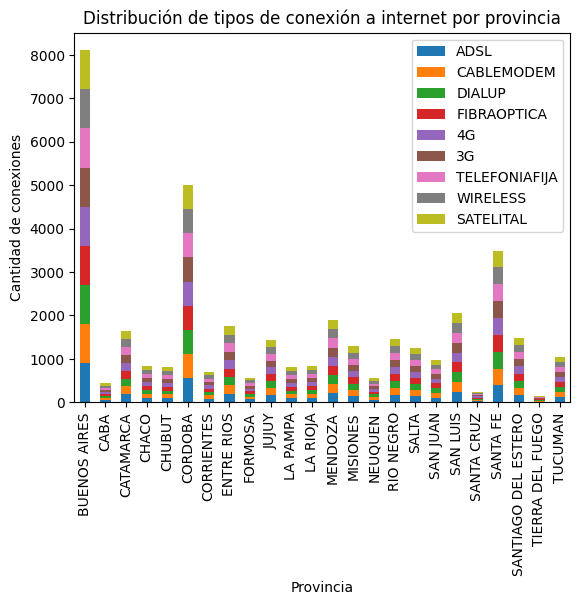

In [117]:
# Probemos ahora un gráfico de barras apiladas de la distribución de los diferentes tipos de conexión.

# Agrupamos los datos por provincia y contar la cantidad de conexiones en cada tipo
grouped_data = df.groupby('Provincia')[['ADSL', 'CABLEMODEM', 'DIALUP', 'FIBRAOPTICA', '4G', '3G', 'TELEFONIAFIJA', 'WIRELESS', 'SATELITAL']].count()

# Creamos el gráfico de barras apiladas
grouped_data.plot(kind='bar', stacked=True)

# Personalizamos el gráfico
plt.title('Distribución de tipos de conexión a internet por provincia')
plt.xlabel('Provincia')
plt.ylabel('Cantidad de conexiones')
plt.legend(loc='upper right')

# Y lo mostramos
plt.show()

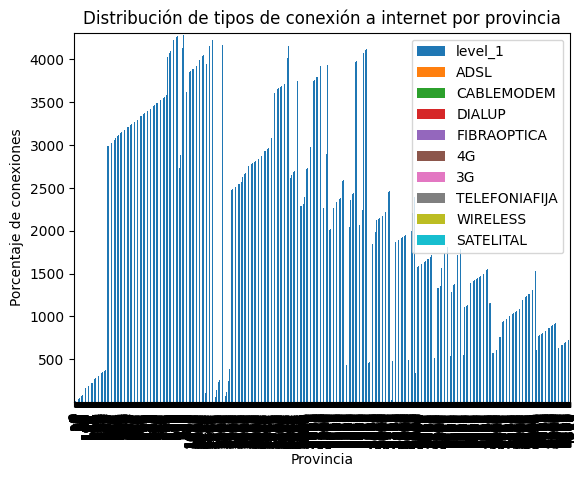

In [119]:
# Otra propuesta del gráfico anterior
# Antes de proceder reemplazaremos los valores string por numéricos
df.replace('--', 0, inplace=True)
df.replace('SI', 1, inplace=True)
df[['ADSL', 'CABLEMODEM', 'DIALUP', 'FIBRAOPTICA', '4G', '3G', 'TELEFONIAFIJA', 'WIRELESS', 'SATELITAL']] = df[['ADSL', 'CABLEMODEM', 'DIALUP', 'FIBRAOPTICA', '4G', '3G', 'TELEFONIAFIJA', 'WIRELESS', 'SATELITAL']].apply(pd.to_numeric)

# Agrupamos los datos por provincia y calcular el porcentaje de cada tipo de conexión
grouped_data = df.groupby('Provincia')[['ADSL', 'CABLEMODEM', 'DIALUP', 'FIBRAOPTICA', '4G', '3G', 'TELEFONIAFIJA', 'WIRELESS', 'SATELITAL']].apply(lambda x: x / x.sum()).reset_index()

# Crear el gráfico de barras apiladas
grouped_data.plot(kind='bar', stacked=True)


# Personalizamos el gráfico
plt.title('Distribución de tipos de conexión a internet por provincia')
plt.xlabel('Provincia')
plt.ylabel('Porcentaje de conexiones')
plt.legend(loc='upper right')

# Y lo mostramos
plt.show()


___
Ahora el df_16_Conect....
___

Aquí creo una copia del dataset obviando algunas columnas

In [ ]:
df16 = df_16_ConectividadalserviciodeInternet_2776151689453170851[['Provincia',
        # 'Partido', 'Localidad', 'Poblacion', 
        'ADSL', 'CABLEMODEM', 'DIALUP', 'FIBRAOPTICA', 
        'SATELITAL', 'WIRELESS', 'TELEFONIAFIJA', '3G', '4G', 
        # 'link', 
        'Latitud', 'Longitud']].copy()

In [ ]:
df16.shape

In [ ]:
print(df16['Latitud'].dtype)
print(df16['Longitud'].dtype)
# Las columnas 'Latitud' y 'Longitud' no están en formato numérico

In [ ]:
df16.info()

___
Backup
___

In [ ]:
df16.to_pickle('backup_df16.pickle')

Una vez hecha copia de seguridad, podemos ir convirtiendo los valores a float

In [ ]:
df16['Latitud'] = df16['Latitud'].str.replace(',', '.')
df16['Longitud'] = df16['Longitud'].str.replace(',', '.')



In [ ]:
df16['Latitud'] = pd.to_numeric(df16['Latitud'], errors='coerce')
df16['Longitud'] = pd.to_numeric(df16['Longitud'], errors='coerce')

In [ ]:
print(df16['Latitud'].dtype)
print(df16['Longitud'].dtype)
# Las columnas 'Latitud' y 'Longitud' ahora ya sí son 'float64'

In [ ]:
df16.sample(8)

-24.966090	-65.489590
-60.737817	-44.737660
-28.533448	-65.682128

In [ ]:
# Comprobamos si hay valores nulos
missing_values = df16[['Latitud', 'Longitud']].isnull().sum()
print(missing_values)

In [ ]:
df16 = pd.read_pickle('backup_df16.pickle')

In [ ]:
# Eliminaremos filas que contengan valores faltantes o nulos en las columnas 'Latitud' y 'Longitud'
df16 = df16.dropna(subset=['Latitud', 'Longitud'])

In [ ]:
missing_values = df16[['Latitud', 'Longitud']].isnull().sum()
print(missing_values)

In [ ]:
df16.head()

In [ ]:
# pip install folium
import folium

In [ ]:
map_arg = folium.Map(location=[-38, -64], 
                     zoom_start=4) # Ubicación y zoom de Argentina

In [ ]:
for row in df16.itertuples():
    folium.Marker(
       location=[row.Latitud, row.Longitud],
       icon=folium.Icon(color='blue') # Opcional, para poner un icono
    ).add_to(map_arg)

In [ ]:
map_arg.save('map.html')

In [ ]:
from IPython.display import display
display(map_arg)

In [ ]:
df16.columns

In [ ]:
# El anterior mapa era para comprobar el funcionamiento de folium
# Ahora vamos a explorar el df16 filtrando
filtered_df = df16[df16['WIRELESS'] == 'SI']
map_arg = folium.Map(location=[-38, -64], zoom_start=4)
for row in filtered_df.itertuples():
    folium.Marker(
        location=[row.Latitud, row.Longitud],
        icon=folium.Icon(color='blue')
    ).add_to(map_arg)
map_arg.save('mapWireless.html')
display(map_arg)

In [ ]:
# Exportamos df16 a CSV para su uso en PowerBI
df16.to_csv('./datos_tratados/df16.csv', index=False)

In [ ]:
df16.isna().sum()

___
Las pruebas con el dataset 16 no nos parecen del todo satisfactorias, las referencias geográficas realmente no son necesarias para hacer mapas en PowerBI.  
Vamos pues con el dataset 15 que es similar. Esta vez conservando los nombres de las localidades.

In [ ]:
df_15_Listadodelocalidadesconconectividadainternet_2750221689453131271.sample(8)

In [ ]:
# Vamos a grabar el dataset en el disco para usarlo después en PowerBI.
# Vamos a probar el formato .parquet
df_15_Listadodelocalidadesconconectividadainternet_2750221689453131271.to_parquet('./datos_tratados/df15.parquet')

In [ ]:
df15 = df_15_Listadodelocalidadesconconectividadainternet_2750221689453131271.copy()

In [ ]:
df15.info()

In [ ]:
# Localidades sin ningún tipo de conectividad a Internet
filtered_data = df15.iloc[:, 3:12].apply(lambda x: x != 'SI').all(axis=1)
localidades = df15.loc[filtered_data, 'Localidad']

In [ ]:
localidades.count()
# Hay 776 localidades en Argentina sin ningún tipo de tecnología

In [ ]:
# Agrupar las localidades por provincia y contar el número de localidades en cada provincia
count_localidades_por_provincia = df15.loc[filtered_data, 'Localidad'].groupby(df15.loc[filtered_data, 'Provincia']).count()
 # Mostrar el recuento de localidades por provincia
print(count_localidades_por_provincia)

In [ ]:
# Group the data by province and technology, and count the number of localities
count_localities_by_province_technology = df.groupby(['Provincia', 'ADSL', 'CABLEMODEM', 'DIALUP', 'FIBRAOPTICA', '4G', '3G', 'TELEFONIAFIJA', 'WIRELESS', 'SATELITAL']).size().reset_index(name='Count')
 # Print the result
print(count_localities_by_province_technology)

In [ ]:
# Group the data by province and sum the counts for each technology
count_localities_by_province = count_localities_by_province_technology.groupby('Provincia').sum().reset_index()
 # Print the simplified result
print(count_localities_by_province)

___
BACKUP
___

In [ ]:
df15.to_parquet('./backup_df15.parquet')

In [ ]:
# Reemplazar los valores '--' por 0 y los 'SI' por 1
df15.replace('--', 0, inplace=True)
df15.replace('SI', 1, inplace=True)



In [ ]:
df15.to_parquet('./datos_tratados/df15_digital.parquet')
# guardamos el archivo convertido en .parquet para pruebas en Power BI
# a la hora de "conectar" un archivo .parquet en PowerBI nos pide una URL
# en local simplemente indicamos la ruta de la siguiente manera:
# file:///D:/HENRY2023/M7(PI)/DTS-12/PI_DA_RAFTXO/datos_tratados/df15_digital.parquet


In [ ]:
 # Convertir las columnas de tecnología a tipo numérico
cols_tecnologia = ['ADSL', 'CABLEMODEM', 'DIALUP', 'FIBRAOPTICA', '4G', '3G', 'TELEFONIAFIJA', 'WIRELESS', 'SATELITAL']
df15[cols_tecnologia] = df15[cols_tecnologia].apply(pd.to_numeric)


___
AccesoTotalYP = 
CALCULATE([AccesoTotal], DateADD(Calendario[Date],-1,YEAR))

In [ ]:
pd.set_option('display.max_columns',33)

In [ ]:
# Agrupar los datos por provincia y sumar los valores 'SI' para cada tecnología
count_si_by_province_technology = df15.groupby('Provincia')[cols_tecnologia].sum().reset_index()

In [ ]:
# Mostrar el resultado
print(count_si_by_province_technology)

In [ ]:
# Create a top 5 ranking for each technology
top5_rankings = {}
for technology in cols_tecnologia:
    top5_rankings[technology] = count_si_by_province_technology[['Provincia', technology]].nlargest(5, technology)
# Print the top 5 rankings for each technology
for technology, ranking in top5_rankings.items():
    print(f"Top 5 for {technology}:")
    print(ranking)
    print()

In [ ]:
import matplotlib.pyplot as plt
 # Create a bar chart for each technology's top 5 rankings
for technology, ranking in top5_rankings.items():
    plt.figure(figsize=(10, 6))
    plt.bar(ranking['Provincia'], ranking[technology])
    plt.xlabel('Provincia')
    plt.ylabel('Count')
    plt.title(f'Top 5 for {technology}')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
count_si_by_province_technology.to_parquet('./datos_tratados/df15(tecnoXprov).parquet')
# grabamos este filtro en un parquet para usarlo despues en PowerBI

In [ ]:
df15[['Localidad','Provincia']].sample(1)

Oportunidades de negocio:  

     Acceso a Internet de alta velocidad   

     Despliegue de servicios en zonas rurales

In [ ]:
# seguir con ETL/EDA según: https://youtu.be/xi0vhXFPegw?t=956